# Machine Learning

## Topic: Sudan GDP - Historical Data Predictor (Linear Regerasstion)
**<FONT COLOR="#FF0000">NOTE</FONT>** : This notebook is where the data was analyzed and the predictive models were
built for the app. For more information and this notebook, visit us at <a href='https://github.com/mdolib?tab=repositories'>Mohammed Dolib</a>

### Econemy
GDP at purchaser's prices is the sum of gross value added by all resident producers in the economy plus any product taxes and minus any subsidies not included in the value of the products. It is calculated without making deductions for depreciation of fabricated assets or for depletion and degradation of natural resources. Data are in current U.S. dollars. Dollar figures for GDP are converted from domestic currencies using single year official exchange rates. For a few countries where the official exchange rate does not reflect the rate effectively applied to actual foreign exchange transactions, an alternative conversion factor is used.
- Sudan gdp for 2021 was $34.33B, a 26.97% increase from 2020.

- Sudan gdp for 2020 was $27.03B, a 16.4% decline from 2019.

- Sudan gdp for 2019 was $32.34B, a 0.01% increase from 2018.

- Sudan gdp for 2018 was $32.33B, a 75.07% decline from 2017.

### Required Libraries

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import Dataset
tables = pd.read_html('https://www.macrotrends.net/countries/SDN/sudan/gdp-gross-domestic-product')

In [3]:
len(tables)

4

In [4]:
tables[1]

Sudan GDP - Historical Data                             
                          Year       GDP Per Capita  Growth
0                         2021   $34.33B       $752  -1.87%
1                         2020   $27.03B       $608  -3.63%
2                         2019   $32.34B       $748  -2.18%
3                         2018   $32.33B       $770  -2.68%
4                         2017  $129.72B     $3,189   0.71%
..                         ...       ...        ...     ...
57                        1964    $1.61B       $129  -1.12%
58                        1963    $1.57B       $129  -2.85%
59                        1962    $1.54B       $130   6.92%
60                        1961    $1.42B       $123   0.02%
61                        1960    $1.31B       $116       %

[62 rows x 4 columns]

### Exploratory Analytics & Data wrangling

In [5]:
sudan_table = tables[1]

In [6]:
df = sudan_table['Sudan GDP - Historical Data']

In [7]:
df.drop(['GDP', 'Growth'], axis=1, inplace=True)

### Transforming Categorical Features

In [8]:
df['Per Capita'] = df['Per Capita'].str.replace('$','')

In [9]:
df

,Year,Per Capita
0,2021,752
1,2020,608
2,2019,748
3,2018,770
4,2017,"3,189"
...,...,...
57,1964,129
58,1963,129
59,1962,130
60,1961,123


In [10]:
df.dtypes

Year           int64
Per Capita    object
dtype: object

In [11]:
df['Per Capita'] = df['Per Capita'].str.replace(',','')

In [12]:
df

,Year,Per Capita
0,2021,752
1,2020,608
2,2019,748
3,2018,770
4,2017,3189
...,...,...
57,1964,129
58,1963,129
59,1962,130
60,1961,123


In [13]:
df = df.astype('int64')

In [14]:
df.dtypes

Year          int64
Per Capita    int64
dtype: object

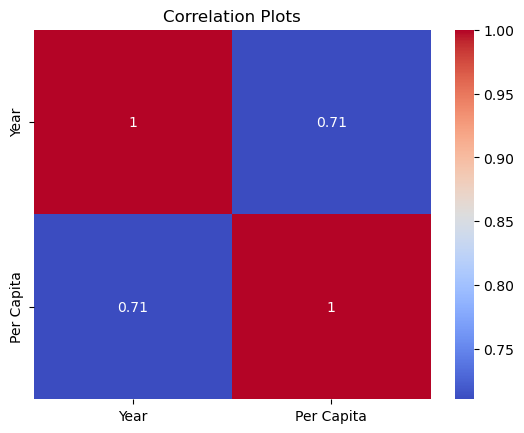

In [15]:
# Correlation Plots
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)
plt.title('Correlation Plots')
plt.show()

### Checking For Outliers

<AxesSubplot:xlabel='Year'>

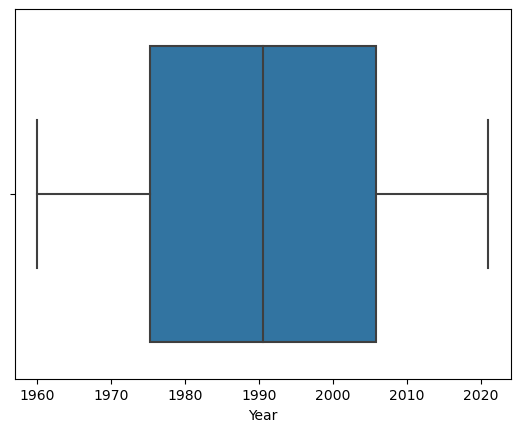

In [16]:
# Boxplot for Year columns 
sns.boxplot(df['Year'])

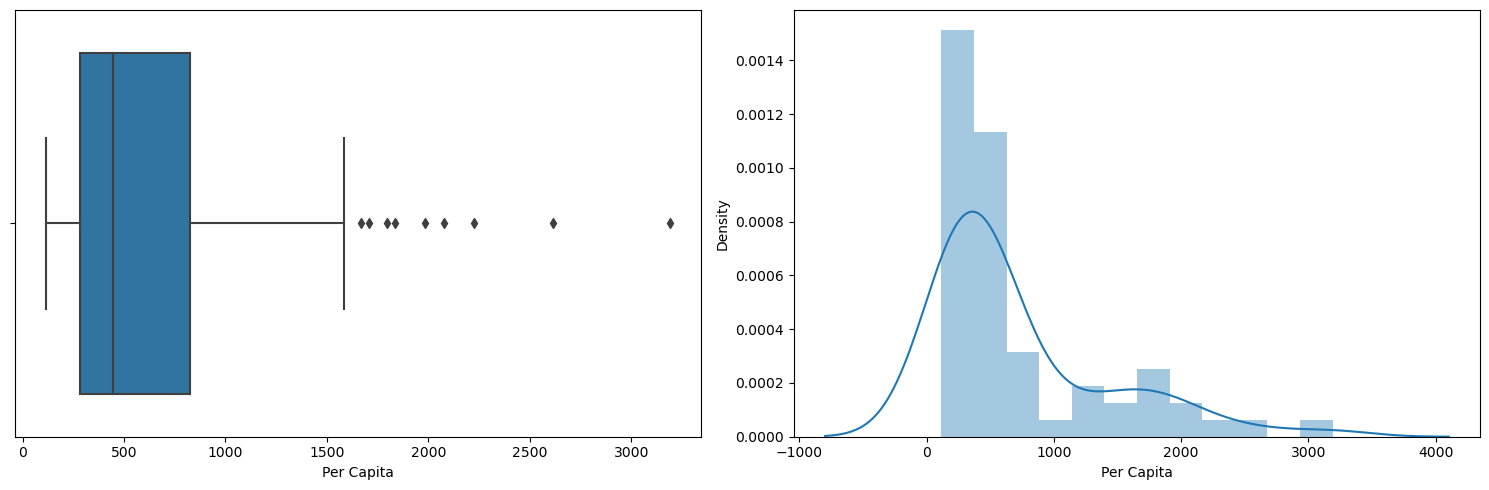

In [17]:
# Boxplot for Per Capita columns 
fig = plt.figure(figsize=(15,5))
grid = fig.add_gridspec(1,2)

ax0 = fig.add_subplot(grid[0,0])
sns.boxplot(df['Per Capita'])


ax1 = fig.add_subplot(grid[0,1])
sns.distplot(df['Per Capita'])
plt.tight_layout()

### Z-Secore Method

In [18]:
# find the limit
upper_limit = df['Per Capita'].mean() + 0.9*df['Per Capita'].std()
lower_limit = df['Per Capita'].mean() - 0.9*df['Per Capita'].std()
print('Upper limit : ', upper_limit)
print('Lower limit : ', lower_limit)

Upper limit :  1344.7509585995845
Lower limit :  93.6683962391254


In [19]:
# find the outlier
df[(df['Per Capita'] > upper_limit) | (df['Per Capita'] < lower_limit)]

,Year,Per Capita
4,2017,3189
5,2016,2614
6,2015,2226
7,2014,2076
8,2013,1835
9,2012,1797
10,2011,1983
11,2010,1706
12,2009,1383
13,2008,1586


In [20]:
# termming - delet the outlier from dataset
new_df = df[(df['Per Capita'] < upper_limit) & (df['Per Capita'] > lower_limit)]
print('Dataset before removeing outlier : ', len(df))
print('New Dataset after remoeving outlier : ',len(new_df))
print('Outlier',len(df) - len(new_df))

Dataset before removeing outlier :  62
New Dataset after remoeving outlier :  50
Outlier 12


<AxesSubplot:xlabel='Per Capita'>

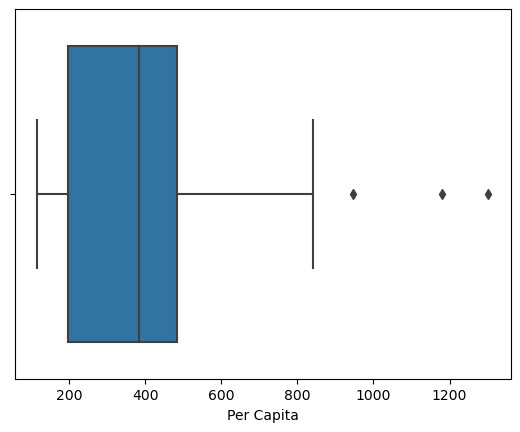

In [21]:
sns.boxplot(new_df['Per Capita'])

<AxesSubplot:xlabel='Year', ylabel='Per Capita'>

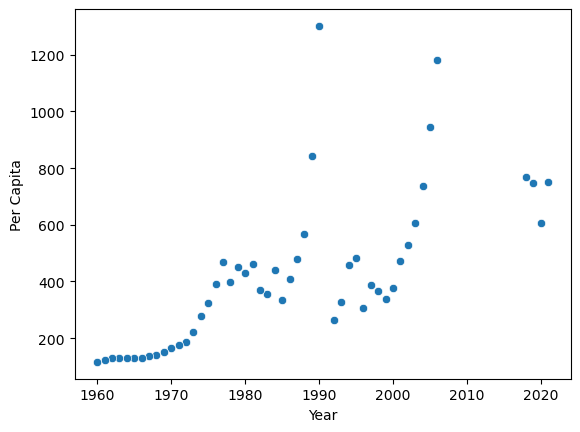

In [22]:
sns.scatterplot(data=new_df, x=new_df['Year'], y=new_df['Per Capita'])

### Model Selection - Linear Regresstion

#### Split and Scale
This split will be used to predict quality

In [23]:
# Selecting Dependent and Independent variables 
X = new_df['Year']
y = new_df['Per Capita']

Now we will split the independent and dependent variables into training and test sets for our
models. 80% of our data will be used to train our models and the remaining 30% will be used for testing.

In [24]:
# Import machine learing libraries
# Train and Test split for supervised training  
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [25]:
print("The shape of X_train is:", X_train.shape)
print("The shape of X_test is:", X_test.shape)
print("The shape of y_train is:", y_train.shape)
print("The shape of y_test is:", y_test.shape)

The shape of X_train is: (35,)
The shape of X_test is: (15,)
The shape of y_train is: (35,)
The shape of y_test is: (15,)


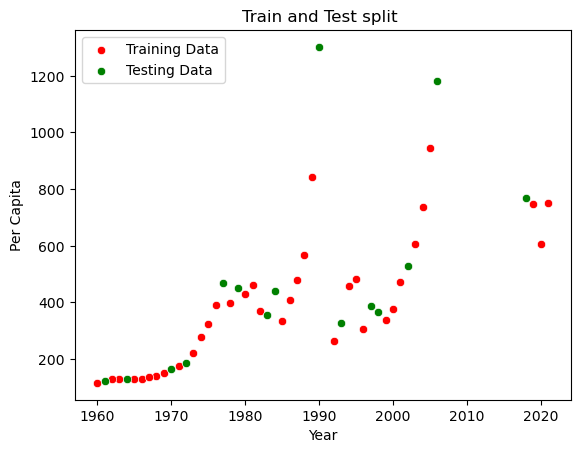

In [26]:
# # Train and Test split visualization 
sns.scatterplot(X_train, y_train, label='Training Data', color='r' )
sns.scatterplot(X_test, y_test, label='Testing Data', color='g' )
plt.title('Train and Test split ')
plt.show()

In [27]:
# Createing liner model and train it 
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [28]:
%%time
model.fit(X_train.values.reshape(-1,1), y_train.values)

Wall time: 0 ns


LinearRegression()

In [29]:
# Use model to predict on TEST data
prediction = model.predict(X_test.values.reshape(-1,1))
prediction

array([517.90041728, 229.75354863, 325.80250484, 165.72091115,
       475.21199229, 133.70459241, 368.49092983, 379.16303608,
       304.45829235, 443.19567356, 528.57252353, 613.9493735 ,
       251.09776112, 571.26094851, 742.01464845])

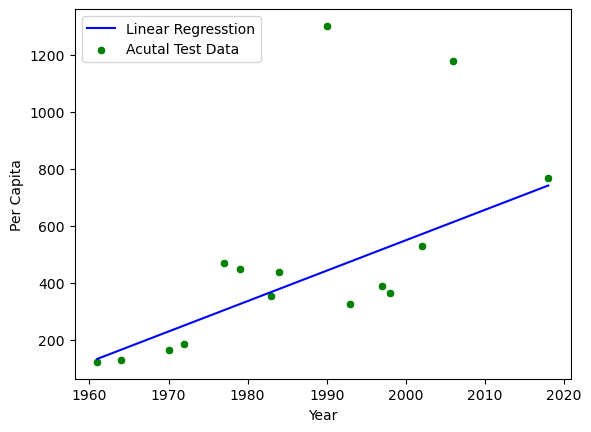

In [30]:
# Plot prediction line against actual test data
sns.lineplot(X_test, prediction, label='Linear Regresstion', color='b' )
sns.scatterplot(X_test, y_test, label='Acutal Test Data', color='g' )
plt.legend()
plt.show()

In [31]:
# Predict Per Capita for Sudan on year 2022
print('Predict Per Capita for Sudan on year 2022 is : ',model.predict(np.array([[2022]]))[0].round(2))

Predict Per Capita for Sudan on year 2022 is :  784.7


In [32]:
#score this model 
accuracy = model.score(X_test.values.reshape(-1,1), y_test)
print('Log Regression Accuracy:',(accuracy*100).round(2),'%')

Log Regression Accuracy: 32.51 %


Our Logisitic Regression model gave us a preliminary accuracy score of 32.51%, which is quite low. To tune our model to see if we can improve on that number. we need more bigger dataset and added features to train model for butter tuning.

In [33]:
# Predict Per Capita for Sudan on year 2023
print('Predict Per Capita for Sudan on year 2023 is : ',model.predict(np.array([[2023]]))[0].round(2))

Predict Per Capita for Sudan on year 2023 is :  795.38


Prediction can be consider is quite true if we consider Sudan has been facing political and economic challenges for many years. since 2019 and The COVID-19 pandemic has also had a significant impact on Sudan's economy